In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.util import ngrams
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import statistics

In [2]:
df_intrusion = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int", sep = " ", header = None)
df_intrusion_normal = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int", sep = " ", header = None)
df_intrusion.columns = ['pid', 'system_calls']
df_intrusion_normal.columns = ['pid', 'system_calls']
print(df_intrusion.head(2))
print()
print(df_intrusion_normal.head(2))

   pid  system_calls
0  167            90
1  167           125

   pid  system_calls
0  167            90
1  167           125


In [6]:
intrusion_dict = {}
n_dict = {}
for pid in list(set(df_intrusion['pid'].values)):
    intrusion_dict[pid] = " ".join(str(value) for value in list(df_intrusion[df_intrusion['pid'] == pid]['system_calls'].values))

for pid in list(set(df_intrusion_normal['pid'].values)):
    n_dict[pid] = " ".join(str(value) for value in list(df_intrusion_normal[df_intrusion_normal['pid'] == pid]['system_calls'].values))

intrusion_dict[167]

'90 125 125 106 5 90 6 5 3 90 90 90 90 6 125 91 125 125 125 136 49 24 47 50 45 45 5 106 106 106 106 106 2 1'

In [8]:
intrusion_list = []
n_list = []

for key in intrusion_dict.keys():
    a = intrusion_dict[key]
    tokens = [token for token in a.split(" ") if token != ""]
    
    for ele in list(ngrams(tokens, 25)):
        intrusion_list.append(ele)
        
for key in n_dict.keys():
    a = n_dict[key]
    tokens = [token for token in a.split(" ") if token != ""]
    
    for ele in list(ngrams(tokens, 25)):
        n_list.append(ele) 

print(f"Length of the instruction list : {len(intrusion_list)}")
print(f"Length of normal list : {len(n_list)}")

Length of the instruction list : 7627
Length of normal list : 469


In [11]:
intrusion_df = pd.DataFrame(intrusion_list)
df_normal = pd.DataFrame(n_list)
intrusion_df['class'] = 1
df_normal['class'] = 0
print(f"shape of the intrusion dataframe : {intrusion_df.shape}")
print(f"shape of the normal dataframe : {df_normal.shape}")

shape of the intrusion dataframe : (7627, 26)
shape of the normal dataframe : (469, 26)


In [13]:
df_final = pd.DataFrame()
df_final = df_final.append(intrusion_df)
df_final = df_final.append(df_normal)
print(df_final.shape)

(8096, 26)


In [14]:
df_final = df_final.drop_duplicates(subset = df_final.columns[:-1], keep = 'last')
df_final.shape

(333, 26)

In [16]:

x = df_final.drop("class", axis = 1)
y = df_final['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 123)
model = DecisionTreeClassifier(max_depth = 10)
model.fit(x_train, y_train)
pred = dtclassifier.predict(x_valid)
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.95      1.00      0.97        35

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



In [18]:
cosine_similar_ngram = {}

for ngram in range(5, 26, 5):

    df_intrusion = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int", sep = " ", header = None)
    df_normal = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int", sep = " ", header = None)

    df_intrusion.columns = ['pid', 'system_calls']
    df_normal.columns = ['pid', 'system_calls']

    intrusion_dict = {}
    normal_dict = {}
    
    for pid in list(set(df_intrusion['pid'].values)):
        intrusion_dict[pid] = " ".join(str(value) for value in list(df_intrusion[df_intrusion['pid'] == pid]['system_calls'].values))

    for pid in list(set(df_normal['pid'].values)):
        normal_dict[pid] = " ".join(str(value) for value in list(df_normal[df_normal['pid'] == pid]['system_calls'].values))

    intrusion_list = []
    normal_list = []
    for key in intrusion_dict.keys():
        s = intrusion_dict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            intrusion_list.append(ele)

    for key in normal_dict.keys():
        s = normal_dict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            normal_list.append(ele)

    intrusion_df = pd.DataFrame(intrusion_list)
    normal_df = pd.DataFrame(normal_list)

    intrusion_df['class'] = 1
    normal_df['class'] = 0

    combined_df = pd.DataFrame()

    combined_df = combined_df.append(intrusion_df)
    combined_df = combined_df.append(normal_df)


    combined_df = combined_df.drop_duplicates(subset = combined_df.columns[:-1], keep = 'last')
    

    from sklearn.metrics.pairwise import cosine_similarity
    import statistics

    similarities_list = []
    for i in range(0, 100):
        list1 = list(combined_df[combined_df['class'] == 0].sample(n = 1).iloc[0, :].values)
        list2 = list(combined_df[combined_df['class'] == 1].sample(n = 1).iloc[0, :].values)
        try:
            similarities_list.append(cosine_similarity([list1], [list2]))
        except Exception as e:
            print(e)
            print(list1, list2)

    print(ngram, statistics.median(similarities_list)[0][0])
    print()
    cosine_similar_ngram[ngram] = statistics.median(similarities_list)[0][0]

5 0.8028979470447

10 0.7596806832639615

15 0.7211310056624977

20 0.7399434249818397

25 0.7120446034439848



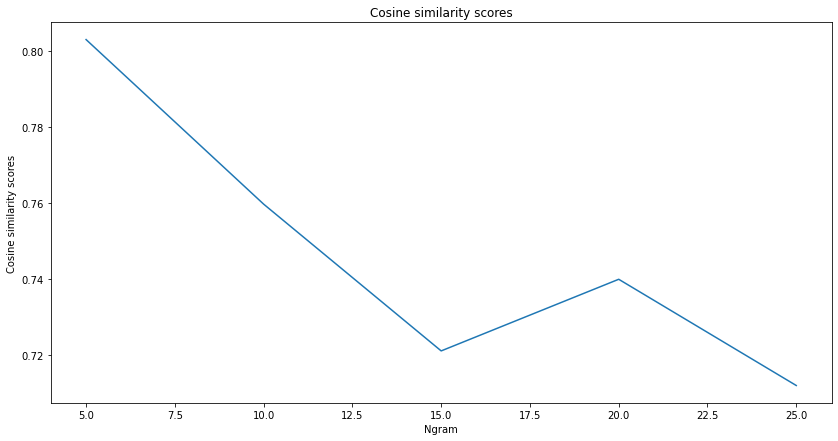

In [19]:
cosine_similar_ngram_df = pd.DataFrame({"Ngram":list(cosine_similar_ngram.keys()), "Similarity_scores": list(cosine_similar_ngram.values())})
plt.rcParams['figure.figsize'] = [14, 7]
sns.lineplot(x = "Ngram", y = "Similarity_scores", data = cosine_similar_ngram_df)
plt.title("Cosine similarity scores")
plt.xlabel("Ngram")
plt.ylabel("Cosine similarity scores")
plt.show()